In [24]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import matplotlib
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
seed = 100

%matplotlib inline

In [25]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
bank_marketing = fetch_ucirepo(id=222) 
  
# data (as pandas dataframes) 
X = bank_marketing.data.features 
y = bank_marketing.data.targets 

df = X
df["y"] = y


In [26]:
#seleccionem les variables categoriques del dataframe
categorical_columns = df.select_dtypes(include=['object']).columns
#seleccionem les variables numèriques del dataframe
numeric_columns = df.select_dtypes(include=['int64']).columns

In [27]:
from sklearn.preprocessing import StandardScaler

numdf = df[numeric_columns]
scaler = StandardScaler()
norm_data = scaler.fit_transform(numdf)
normdf = pd.DataFrame(norm_data,columns=numdf.columns)
normdf["y"] = df["y"]
normdf.head(10)


,age,balance,day_of_week,duration,campaign,pdays,previous,y
0,1.606965,0.256419,-1.298476,0.011016,-0.569351,-0.411453,-0.25194,no
1,0.288529,-0.437895,-1.298476,-0.416127,-0.569351,-0.411453,-0.25194,no
2,-0.747384,-0.446762,-1.298476,-0.707361,-0.569351,-0.411453,-0.25194,no
3,0.571051,0.047205,-1.298476,-0.645231,-0.569351,-0.411453,-0.25194,no
4,-0.747384,-0.447091,-1.298476,-0.233620,-0.569351,-0.411453,-0.25194,no
5,-0.559037,-0.371551,-1.298476,-0.462724,-0.569351,-0.411453,-0.25194,no
6,-1.218254,-0.300608,-1.298476,-0.159841,-0.569351,-0.411453,-0.25194,no
7,0.100181,-0.446762,-1.298476,0.473107,-0.569351,-0.411453,-0.25194,no
8,1.606965,-0.407679,-1.298476,-0.808322,-0.569351,-0.411453,-0.25194,no
9,0.194355,-0.252657,-1.298476,-0.788906,-0.569351,-0.411453,-0.25194,no


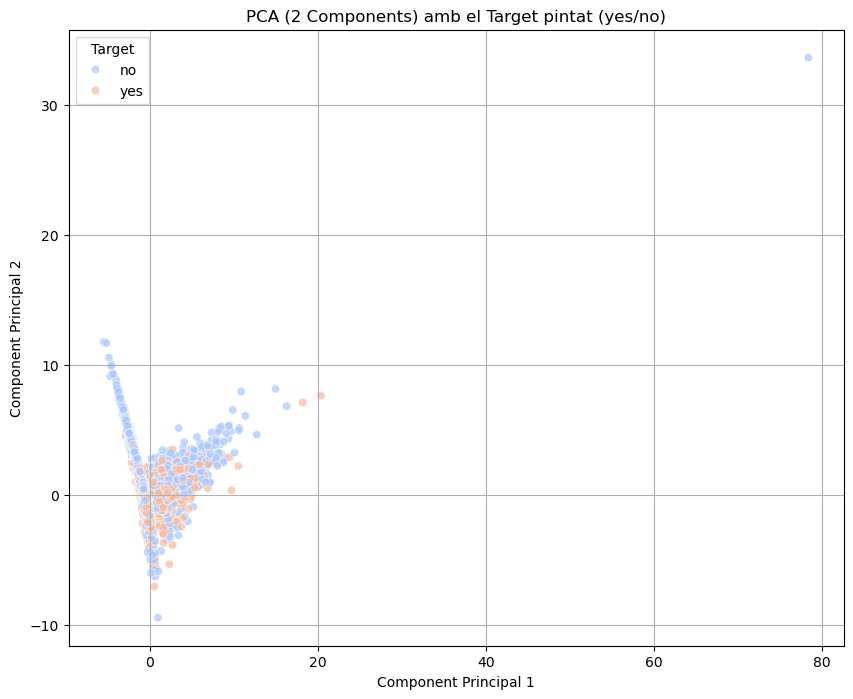

In [28]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(normdf.iloc[:,:-1])

pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])

# Afegir la columna de classe (df['y']) per a utilitzar-la com a color
pca_df['Target'] = df['y']

# Generar el gràfic 2D amb colors diferents per a les classes
plt.figure(figsize=(10, 8))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Target', palette='coolwarm', alpha=0.7)
plt.title('PCA (2 Components) amb el Target pintat (yes/no)')
plt.xlabel('Component Principal 1')
plt.ylabel('Component Principal 2')
plt.grid(True)
plt.show()

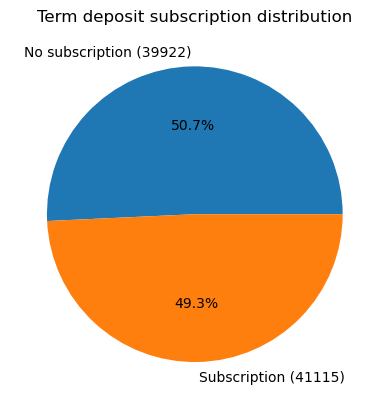

In [29]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import ADASYN

def show_distribution(y_df):
    freq = y_df["y"].value_counts()
    plt.pie(freq, labels=('No subscription ('+str(freq["no"])+')', 'Subscription ('+str(freq["yes"])+')'), autopct='%1.1f%%')
    plt.title("Term deposit subscription distribution")
    plt.show()
numbers_df = df[numeric_columns]
numbers_df

# Creant un objecte RandomOverSampler
ros = ADASYN(random_state=10)

# Aplicant Random Over-Sampling
X_resampled_ros, y_resampled_ros = ros.fit_resample(numbers_df, y)

show_distribution(y_resampled_ros)


In [30]:
X_resampled_ros

,age,balance,day_of_week,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0
...,...,...,...,...,...,...,...
81032,71,1708,10,474,1,-1,0
81033,42,1696,12,471,5,-1,0
81034,35,1709,17,419,2,-1,0
81035,62,1716,18,446,1,-1,0


In [31]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
norm_data_oversampled = scaler.fit_transform(X_resampled_ros)
normdf_oversampled_ros = pd.DataFrame(norm_data_oversampled,columns=numdf.columns)
normdf_oversampled_ros.head(10)

,age,balance,day_of_week,duration,campaign,pdays,previous
0,1.548311,0.176647,-1.309197,-0.274134,-0.519335,-0.471914,-0.3266
1,0.278686,-0.471719,-1.309197,-0.626430,-0.519335,-0.471914,-0.3266
2,-0.718876,-0.480000,-1.309197,-0.866631,-0.519335,-0.471914,-0.3266
3,0.550749,-0.018721,-1.309197,-0.815388,-0.519335,-0.471914,-0.3266
4,-0.718876,-0.480307,-1.309197,-0.475904,-0.519335,-0.471914,-0.3266
5,-0.537501,-0.409765,-1.309197,-0.664862,-0.519335,-0.471914,-0.3266
6,-1.172313,-0.343518,-1.309197,-0.415052,-0.519335,-0.471914,-0.3266
7,0.097311,-0.480000,-1.309197,0.106986,-0.519335,-0.471914,-0.3266
8,1.548311,-0.443503,-1.309197,-0.949901,-0.519335,-0.471914,-0.3266
9,0.187999,-0.298740,-1.309197,-0.933888,-0.519335,-0.471914,-0.3266


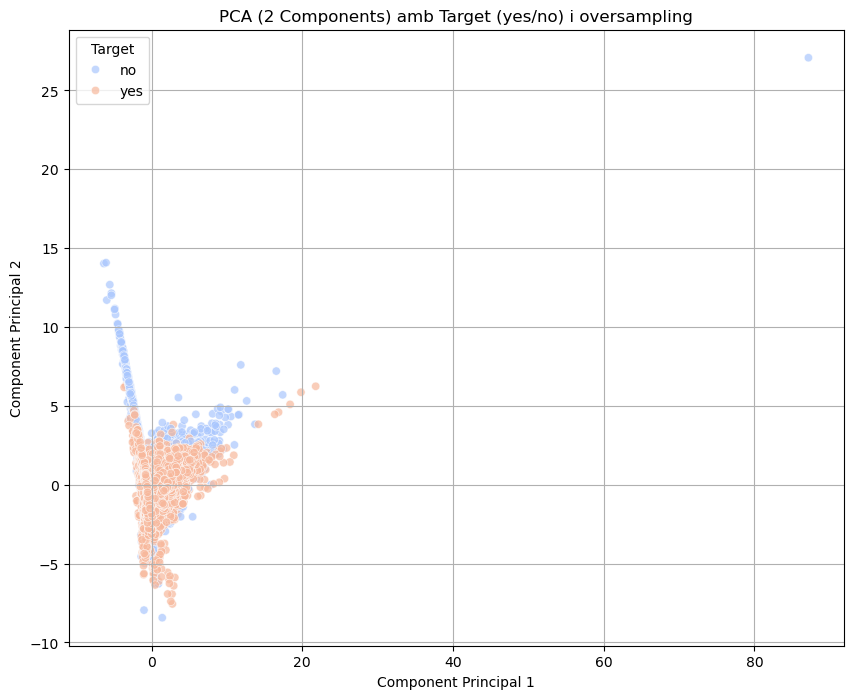

In [32]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(normdf_oversampled_ros)

pca_df_ros = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])

# afegm "y" per posar els colors
pca_df_ros['Target'] = y_resampled_ros

plt.figure(figsize=(10, 8))
sns.scatterplot(data=pca_df_ros, x='PC1', y='PC2', hue='Target', palette='coolwarm', alpha=0.7)
plt.title('PCA (2 Components) amb Target (yes/no) i oversampling')
plt.xlabel('Component Principal 1')
plt.ylabel('Component Principal 2')
plt.grid(True)
plt.show()
